In [1]:
#importing dependencies here
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits 
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
import glob

In [2]:
mnist = fetch_openml("mnist_784")

In [3]:
# mnist

In [4]:
data, target = mnist["data"], mnist["target"]

In [5]:
data.shape

(70000, 784)

In [6]:
target.shape

(70000,)

In [7]:
target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

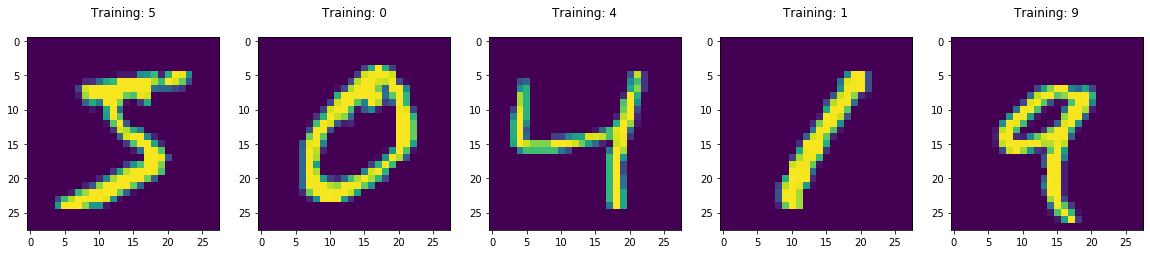

In [8]:
# displaying images and corresponding labels from the digits dataset
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(mnist.data[0:5], mnist.target[0:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (28,28)))
    plt.title("Training: %s\n" %label)

### Splitting the data into training and test data

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.3)

In [11]:
len(X_train)

49000

In [12]:
len(X_test)

21000

### Implementing Logistics Regression for Digits Dataset

In [13]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
lm.fit(X_train, y_train)

C:\Users\eshom\.virtualenvs\digit_recognition_classification_model-h40RarnV\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Model Evaluation

In [15]:
lm.score(X_test, y_test)

0.917952380952381

In [16]:
predictions = lm.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
cm = confusion_matrix(y_test, predictions)

Text(69.0, 0.5, 'Truth')

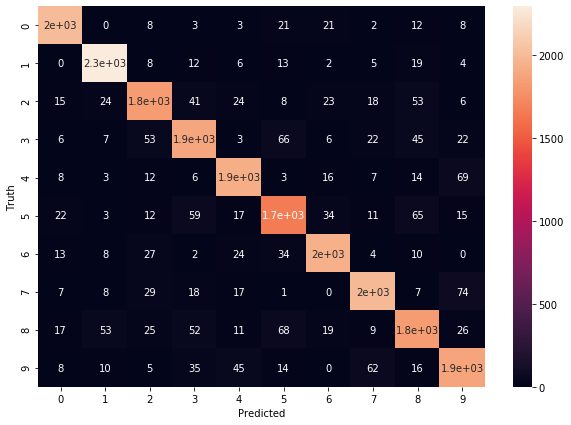

In [19]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2087
           1       0.95      0.97      0.96      2364
           2       0.91      0.90      0.90      2049
           3       0.89      0.89      0.89      2115
           4       0.93      0.93      0.93      2074
           5       0.88      0.87      0.88      1899
           6       0.94      0.94      0.94      2075
           7       0.93      0.93      0.93      2152
           8       0.88      0.87      0.88      2114
           9       0.89      0.91      0.90      2071

    accuracy                           0.92     21000
   macro avg       0.92      0.92      0.92     21000
weighted avg       0.92      0.92      0.92     21000



In [21]:
# reading the digits dataset from sklearn
digits = load_digits()

In [22]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [23]:
digits.data.shape

(1797, 64)

In [24]:
# labels corresponding to the images
digits.target.shape

(1797,)

In [25]:
# digits.images

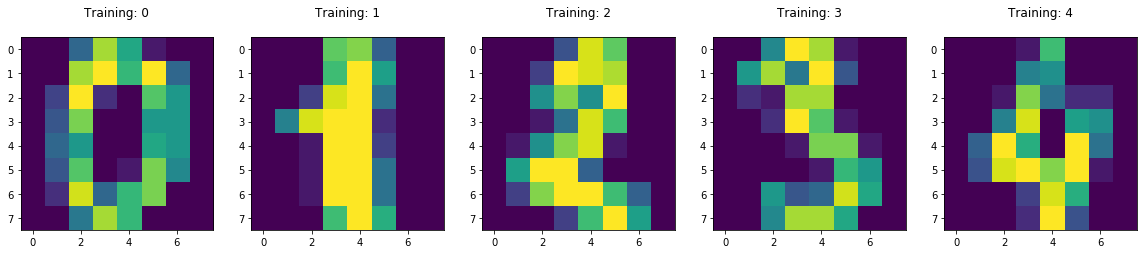

In [26]:
# displaying images and corresponding labels from the digits dataset
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5, index+1)
    plt.imshow(np.reshape(image, (8,8)))
    plt.title("Training: %i\n" %label)

### Splitting the data into training and test data

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3)

In [29]:
len(X_train)

1257

In [30]:
len(X_test)

540

### Implementing Logistics Regression for Digits Dataset

In [31]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(solver="newton-cg", max_iter=1000)
lm

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
lm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

#### Model Evaluation

In [33]:
lm.score(X_test, y_test)

0.9666666666666667

In [34]:
predictions = lm.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
cm = confusion_matrix(y_test, predictions)

Text(69.0, 0.5, 'Truth')

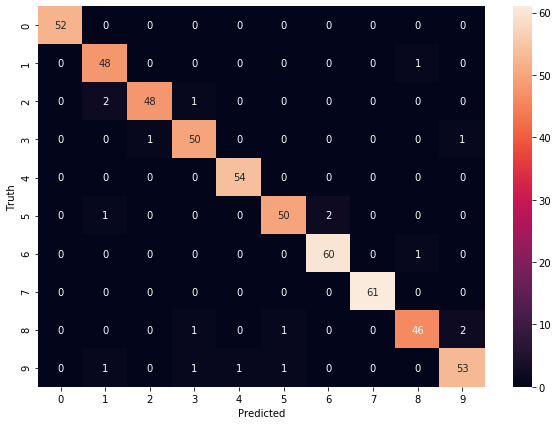

In [37]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       0.92      0.98      0.95        49
           2       0.98      0.94      0.96        51
           3       0.94      0.96      0.95        52
           4       0.98      1.00      0.99        54
           5       0.96      0.94      0.95        53
           6       0.97      0.98      0.98        61
           7       1.00      1.00      1.00        61
           8       0.96      0.92      0.94        50
           9       0.95      0.93      0.94        57

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

